In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import time
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd
import random

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-9999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')

In [4]:
df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]} 
test_set = {2:[], 4:[]}  
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]
X1= np.array(train_data)
X2=np.array(test_data)

In [6]:
for i in test_data:
    test_set[i[-1]].append(i[:-1])

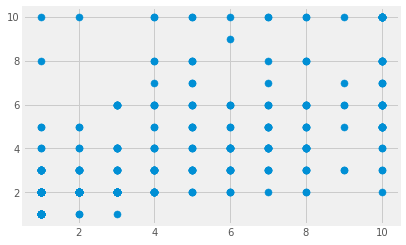

In [7]:
plt.scatter(X1[:,2], X1[:,4], s=50)
plt.show()

In [8]:
colors = 10*["g","r","c","b","k"]

In [18]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:  
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in 
                                                                                    self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)
          
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            if optimized:
                break
                
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        if classification==0:
            classifications=2
        else:
            classifications=4
        
        return classifications


In [19]:
clf = K_Means()
x=clf.fit(X1)
clf.predict(X2)

2

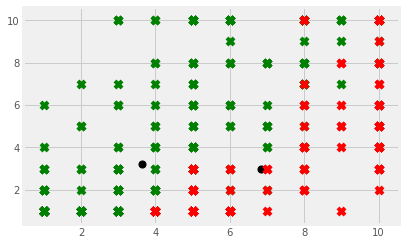

In [20]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=1)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=1)


In [21]:
def Accuracy(key):
    correct = 0
    total=0
    for group in test_set:
        for data in test_set[group]:
            cd = K_Means(key)
            cd.fit(X2)
            vote = cd.predict(X2)
            if group == vote: 
                correct += 1
            total += 1
    return(float(correct)/float(total))

In [22]:
k1=[]
k2=[]
for k in range(1,4):
    k1.append(k)
    k2.append(Accuracy(k))
print(k1)
print(k2)

[1, 2, 3]
[0.6474820143884892, 0.6474820143884892, 0.35251798561151076]


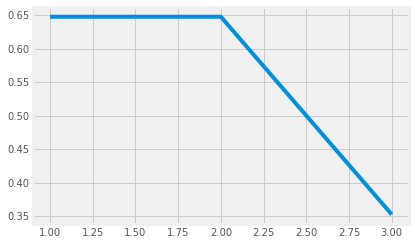

In [23]:
plt.plot(k1,k2)
plt.show()